# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Preparation (Loading the data & Visualizing the data)

In [2]:
d1 = pd.read_excel("Project_Data.xlsx")
d1.head()

,Speed,Feed,DepthOfCut,NoseRadius,Ravg
0,88,0.05,0.2,0.0,4.63
1,88,0.07,0.2,0.0,3.68
2,88,0.10,0.2,0.0,2.75
3,150,0.05,0.2,0.0,4.86
4,150,0.07,0.2,0.0,4.38


In [3]:
d1.describe()

,Speed,Feed,DepthOfCut,NoseRadius,Ravg
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,162.666667,0.070000,0.304167,0.266667,2.219722
std,67.051103,0.018796,0.075929,0.206438,1.374795
min,88.000000,0.050000,0.200000,0.000000,0.470000
25%,88.000000,0.057500,0.237500,0.000000,1.140000
50%,150.000000,0.065000,0.300000,0.300000,1.685000
75%,250.000000,0.077500,0.381250,0.500000,2.995000
max,250.000000,0.100000,0.400000,0.500000,5.610000


### Feature Extraction

In [4]:
cdf = d1[['Speed','Feed','DepthOfCut','NoseRadius','Ravg']]
cdf.head()

,Speed,Feed,DepthOfCut,NoseRadius,Ravg
0,88,0.05,0.2,0.0,4.63
1,88,0.07,0.2,0.0,3.68
2,88,0.10,0.2,0.0,2.75
3,150,0.05,0.2,0.0,4.86
4,150,0.07,0.2,0.0,4.38


## Visualize the data and understand the trend between features & labels

### Polynomial Regression between Speed and Ravg

In [5]:
msk = np.random.rand(len(cdf))<0.8
train = cdf[msk]
test = cdf[~msk]
print ("Training shape:",train.shape)
print ("Testing shape",test.shape)

Training shape: (88, 5)
Testing shape (20, 5)


In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
inp1 = np.asanyarray(train[["Speed"]])
inp1poly = poly.fit_transform (inp1)
out1 = np.asanyarray(train[["Ravg"]])
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(inp1poly,out1)
print ("Coefficients:", reg.coef_)
print ("Intercept:", reg.intercept_)

Coefficients: [[ 0.00000000e+00 -4.34935609e-07 -6.47942737e-05  2.13237491e-07]]
Intercept: [2.90515642]


## Polynomial Regression between Speed and Ravg

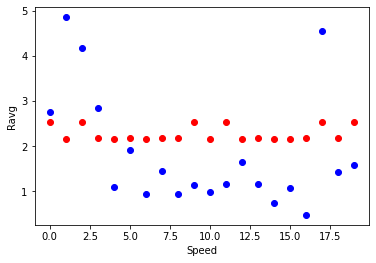

In [7]:
inp1test = np.asanyarray(test[["Speed"]])
inp1testpoly = poly.fit_transform(inp1test)
out1test = np.asanyarray(test[["Ravg"]])
out1pred = reg.predict(inp1testpoly)

x = np.arange(0,len(test),1)
plt.scatter(x,out1test, color = "blue")
plt.scatter(x,out1pred,color = "red")
plt.xlabel("Speed")
plt.ylabel("Ravg")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error(out1test,out1pred))
print ("R2 score",r2_score(out1test,out1pred))

MSE: 1.669240682758621
R2 score -0.03955252922883745


### Polynomial Regression between Feed and Ravg

In [9]:
msk1 = np.random.rand(len(cdf))<0.8
train = cdf[msk1]
test = cdf[~msk1]
print ("Training shape:",train.shape)
print ("Testing shape",test.shape)

Training shape: (82, 5)
Testing shape (26, 5)


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly1 = PolynomialFeatures(degree = 3)
inp2 = np.asanyarray(train[["Feed"]])
inp2poly = poly1.fit_transform (inp2)
out2 = np.asanyarray(train[["Ravg"]])
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(inp2poly,out2)
print ("Coefficients:", reg1.coef_)
print ("Intercept:", reg1.intercept_)


Coefficients: [[     0.            841.26210245 -11489.63845107  50545.95881414]]
Intercept: [-17.58683718]


## Polynomial Regression between Feed and Ravg

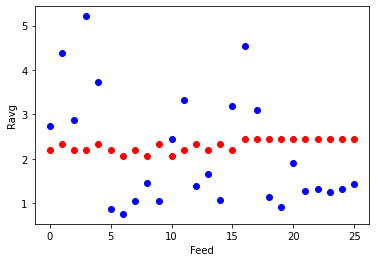

In [11]:
inp2test = np.asanyarray(test[["Feed"]])
inp2testpoly = poly1.fit_transform(inp2test)
out2test = np.asanyarray(test[["Ravg"]])
out2pred = reg1.predict(inp2testpoly)

x1 = np.arange(0,len(test),1)
plt.scatter(x1,out2test, color = "blue")
plt.scatter(x1,out2pred,color = "red")
plt.xlabel("Feed")
plt.ylabel("Ravg")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error(out2test,out2pred))
print ("R2 score",r2_score(out2test,out2pred))

MSE: 1.6739076135819966
R2 score -0.05072340603197545


### Polynomial Regression between Depth_Of_Cut and Ravg

In [13]:
msk2 = np.random.rand(len(cdf))<0.8
train = cdf[msk2]
test = cdf[~msk2]
print ("Training shape:",train.shape)
print ("Testing shape",test.shape)

Training shape: (83, 5)
Testing shape (25, 5)


In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly3 = PolynomialFeatures(degree = 3)
inp3 = np.asanyarray(train[["DepthOfCut"]])
inp3poly = poly3.fit_transform (inp3)
out3 = np.asanyarray(train[["Ravg"]])
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()
reg3.fit(inp3poly,out3)
print ("Coefficients:", reg3.coef_)
print ("Intercept:", reg3.intercept_)

Coefficients: [[   0.          -19.43703169  114.39446534 -181.51336369]]
Intercept: [2.8046946]


##  Polynomial Regression between Depth_Of_Cut and Ravg

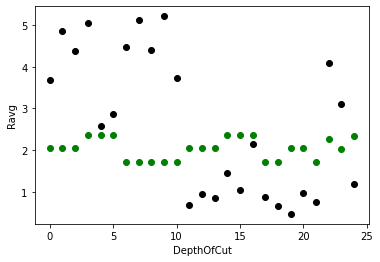

In [15]:
inp3test = np.asanyarray(test[["DepthOfCut"]])
inp3testpoly = poly3.fit_transform(inp3test)
out3test = np.asanyarray(test[["Ravg"]])
out3pred = reg3.predict(inp3testpoly)

x2 = np.arange(0,len(test),1)
plt.scatter(x2,out3test, color = "black")
plt.scatter(x2,out3pred,color = "green")
plt.xlabel("DepthOfCut")
plt.ylabel("Ravg")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error(out2test,out2pred))
print ("R2 score",r2_score(out3test,out3pred))

MSE: 1.6739076135819966
R2 score -0.189396357864823


### Polynomial Regression between Nose_Radius and Ravg

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly4 = PolynomialFeatures(degree = 3)
inp4 = np.asanyarray(train[["NoseRadius"]])
inp4poly = poly4.fit_transform (inp4)
out4 = np.asanyarray(train[["Ravg"]])
from sklearn.linear_model import LinearRegression
reg4 = LinearRegression()
reg4.fit(inp4poly,out4)
print ("Coefficients:", reg4.coef_)
print ("Intercept:", reg4.intercept_)

Coefficients: [[ 0.         -9.22080309  6.42433407  6.52258772]]
Intercept: [3.62086957]


## Polynomial Regression between Nose_Radius and Ravg

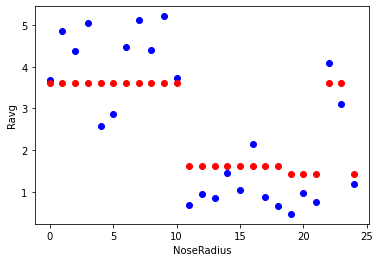

In [18]:
inp4test = np.asanyarray(test[["NoseRadius"]])
inp4testpoly = poly4.fit_transform(inp4test)
out4test = np.asanyarray(test[["Ravg"]])
out4pred = reg4.predict(inp4testpoly)

x4 = np.arange(0,len(test),1)
plt.scatter(x4,out4test, color = "blue")
plt.scatter(x4,out4pred,color = "red")
plt.xlabel("NoseRadius")
plt.ylabel("Ravg")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error(out4test,out4pred))
print ("R2 score",r2_score(out4test,out4pred))

MSE: 0.7219653789422681
R2 score 0.7489652355178305
